# Problem statement

The objective is to cluster the customers of an e-commerce platform into distinct groups based on their purchasing behavior.

The dataset contains the following columns:

- InvoiceNo (integer)
- StockCode (string)
- Description (string)
- Quantity (integer)
- InvoiceDate (date)
- UnitPrice (decimal)
- CustomerID (integer)
- Country (string)

By analyzing the TotalAmount spent and TotalTransactions made by each customer, the company aims to identify different customer segments for targeted marketing strategies, personalized product offerings, and improved customer service.

The clustering process involves data preprocessing, feature engineering, outlier detection and removal, data scaling, and optimal cluster determination through both the Elbow Method and Silhouette Score, culminating in the application of K-Means clustering to categorize customers into meaningful segments.

The notebook contains 6 exercises in total:

* [Exercise 1](#ex_1)
* [Exercise 2](#ex_2)
* [Exercise 3](#ex_3)
* [Exercise 4](#ex_4)
* [Exercise 5](#ex_5)
* [Exercise 6](#ex_6)

In [4]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
#from sklearn_extra.cluster import KMeansExtra

# Step 1: Load the Dataset
# from google.colab import files
# uploaded = files.upload()

df = pd.read_csv('Datasets/clustering-data.csv', encoding='latin1')

Shape of the DataFrame: (541909, 8)

First few rows of the DataFrame:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  

Column names and data types:
InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     objec

C:\Users\Krishnaprasad\AppData\Local\Temp\ipykernel_16952\14550844.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_segmentation['TotalAmount'], df_segmentation['TotalTransactions']], labels=['TotalAmount', 'TotalTransactions'])


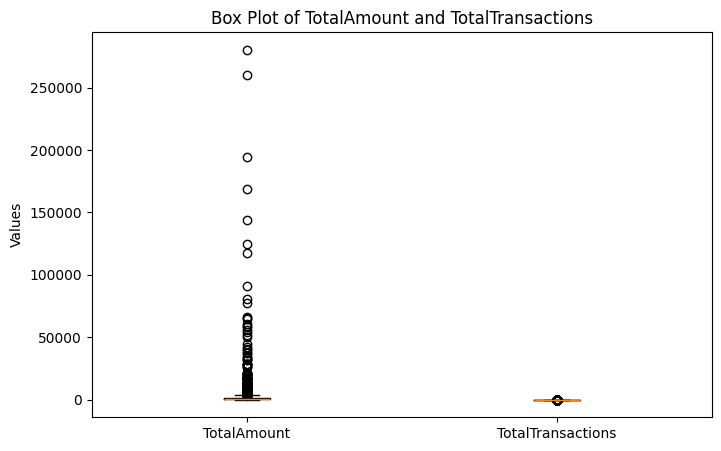

Shape of DataFrame after removing outliers: (3912, 2)


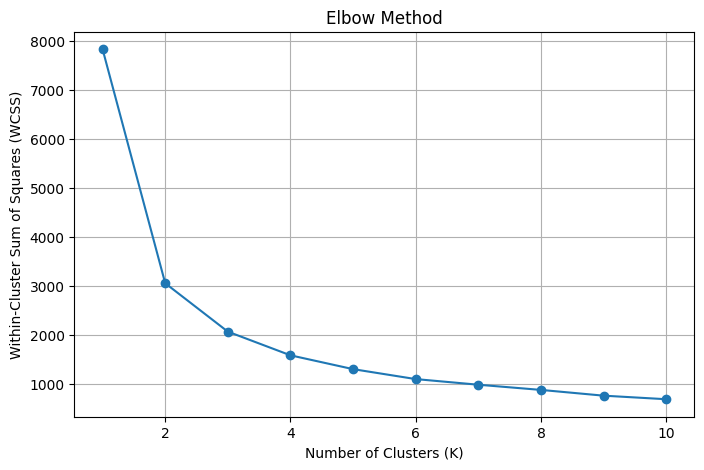

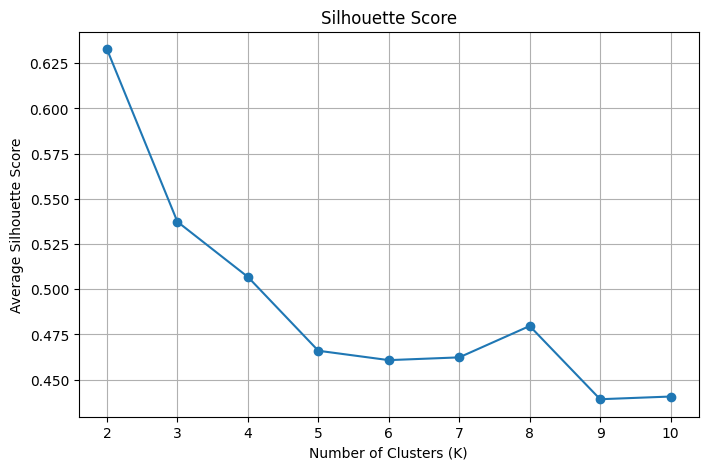

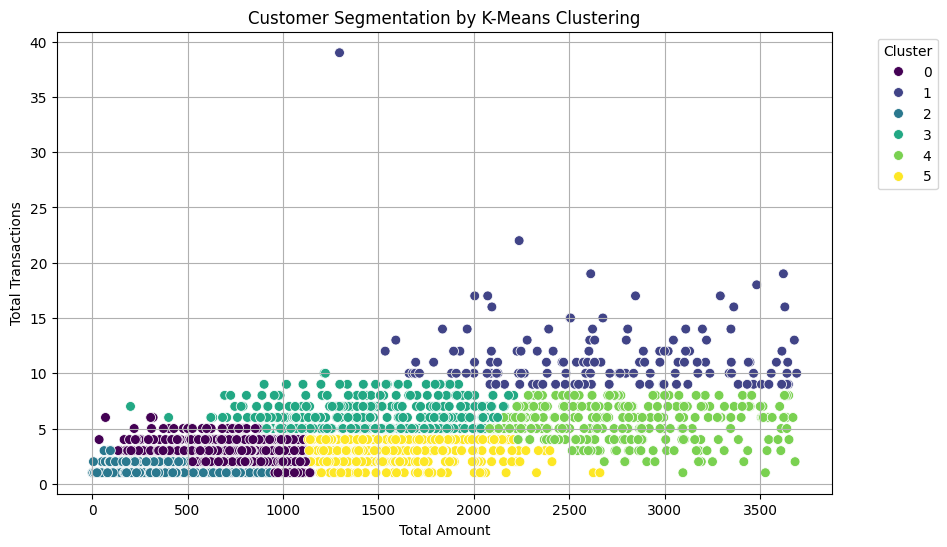

In [5]:
# Step 2: Inspect the Data
print("Shape of the DataFrame:", df.shape)
print("\nFirst few rows of the DataFrame:")
print(df.head())
print("\nColumn names and data types:")
print(df.dtypes)
print("\nMissing values per column:")
print(df.isnull().sum())

# Step 3: Summary Statistics
summary_stats = df.describe(include='all')
print("\nSummary Statistics:")
print(summary_stats)

# Step 4: Data Preprocessing
df_cleaned = df.dropna(subset=['CustomerID'])
df_cleaned = df_cleaned[(df_cleaned['Quantity'] >= 0) & (df_cleaned['UnitPrice'] >= 0)]
columns_to_drop = ['StockCode', 'InvoiceDate', 'Description', 'Country']
df_cleaned = df_cleaned.drop(columns=columns_to_drop)

# Step 5: Feature Engineering
df_cleaned['Amount'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']
df_total_amount = df_cleaned.groupby('CustomerID')['Amount'].sum().reset_index()
df_total_amount.rename(columns={'Amount': 'TotalAmount'}, inplace=True)
df_total_transactions = df_cleaned.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
df_total_transactions.rename(columns={'InvoiceNo': 'TotalTransactions'}, inplace=True)
df_segmentation = pd.merge(df_total_amount, df_total_transactions, on='CustomerID')

# Step 6: Checking for Outliers
df_segmentation.drop('CustomerID', axis=1, inplace=True)
plt.figure(figsize=(8, 5))
plt.boxplot([df_segmentation['TotalAmount'], df_segmentation['TotalTransactions']], labels=['TotalAmount', 'TotalTransactions'])
plt.title('Box Plot of TotalAmount and TotalTransactions')
plt.ylabel('Values')
plt.show()

# Step 7: Removing Outliers from TotalAmount column
Q1 = df_segmentation['TotalAmount'].quantile(0.25)
Q3 = df_segmentation['TotalAmount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_segmentation = df_segmentation[(df_segmentation['TotalAmount'] >= lower_bound) & (df_segmentation['TotalAmount'] <= upper_bound)]
print("Shape of DataFrame after removing outliers:", df_segmentation.shape)

# Step 8: Data Scaling using Standardization
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_segmentation)
df_scaled = pd.DataFrame(df_scaled, columns=df_segmentation.columns)

# Step 9: Finding Optimal Number of Clusters - Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

# Step 10: Finding Optimal Number of Clusters - Silhouette Score Elbow Method
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Score')
plt.grid(True)
plt.show()

# Step 11: Customer Segmentation K-Means Clustering with 6 Clusters
num_clusters = 6
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_model.fit(df_scaled)
df_segmentation['Cluster'] = kmeans_model.labels_

# Step 12: Visualization of Clustering Results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalAmount', y='TotalTransactions', hue='Cluster', data=df_segmentation, palette='viridis', s=50)
plt.xlabel('Total Amount')
plt.ylabel('Total Transactions')
plt.title('Customer Segmentation by K-Means Clustering')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


<a name="ex_1"></a>
# Exercise 1: Understanding the Importance of Removing Outliers

**Question**: In the context of data preprocessing, at the step mentioned in regarding the removal of outliers, explain why it is critical to remove outliers before training a machine learning model. Discuss the potential impacts of outliers on model performance and accuracy.

**Answer**: 
The removal of outliers before training a machine learning model is critical for several key reasons:

1. Impact on Model Performance:
- Outliers can significantly skew the mean and standard deviation of features
- In K-means clustering specifically, outliers can pull cluster centroids away from their natural positions
- This leads to poor cluster formation and misrepresentation of customer segments

2. Business Context:
- In this customer segmentation case, extremely high transaction amounts or frequencies might represent errors or exceptional cases (like bulk purchases by businesses)
- Including these outliers would create clusters that don't represent typical customer behavior patterns

3. Statistical Validity:
- The IQR method used (Q3 + 1.5*IQR) helps maintain statistical validity by:
    - Keeping data within reasonable bounds while preserving natural variations
    - Removing extreme values that could disproportionately influence the clustering algorithm

4. Model Accuracy:
- After removing outliers, the model can better identify meaningful patterns in the majority of customers
- This leads to more actionable and representative customer segments for marketing strategies

<a name="ex_2"></a>
# Exercise 2: Exploring Alternative Scaling Techniques

**Question**: The notebook utilizes StandardScaler() for feature scaling. Identify at least one alternative scaling method that could be used in place of StandardScaler(). Implement this alternative method in the notebook and present the results of scaling the dataframe. Briefly compare the outcomes between the two scaling methods.

Comparison of Scaling Methods:
   StandardScaler_TotalAmount  StandardScaler_TotalTransactions  \
0                    1.099421                          0.425738   
1                    1.051512                         -0.745491   
2                   -0.666340                         -0.745491   
3                    1.954997                          1.987377   
4                   -0.962557                         -0.745491   

   MinMaxScaler_TotalAmount  MinMaxScaler_TotalTransactions  
0                  0.486756                        0.078947  
1                  0.476007                        0.000000  
2                  0.090567                        0.000000  
3                  0.678724                        0.184211  
4                  0.024104                        0.000000  


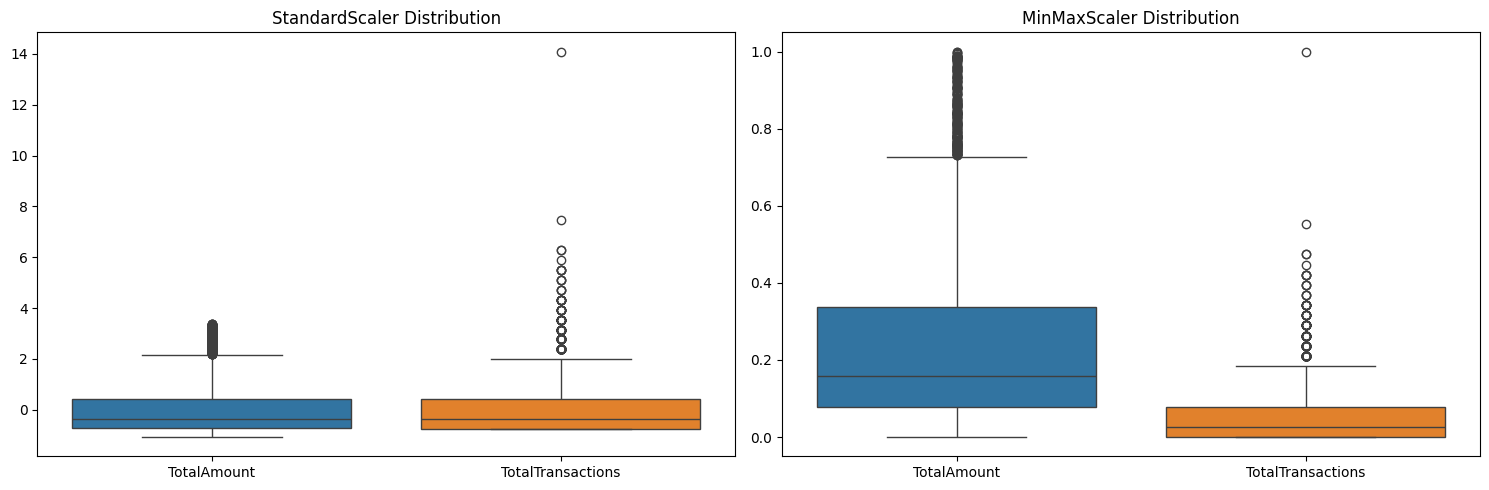

In [7]:
from sklearn.preprocessing import MinMaxScaler

# Apply MinMaxScaler
minmax_scaler = MinMaxScaler()
df_scaled_minmax = minmax_scaler.fit_transform(df_segmentation[['TotalAmount', 'TotalTransactions']])
df_scaled_minmax = pd.DataFrame(df_scaled_minmax, columns=['TotalAmount', 'TotalTransactions'])

# Compare the first few rows of both scaling methods
comparison_df = pd.DataFrame({
    'StandardScaler_TotalAmount': df_scaled['TotalAmount'],
    'StandardScaler_TotalTransactions': df_scaled['TotalTransactions'],
    'MinMaxScaler_TotalAmount': df_scaled_minmax['TotalAmount'],
    'MinMaxScaler_TotalTransactions': df_scaled_minmax['TotalTransactions']
})

print("Comparison of Scaling Methods:")
print(comparison_df.head())

# Visualize the distribution of scaled values
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# StandardScaler distribution
sns.boxplot(data=df_scaled, ax=ax1)
ax1.set_title('StandardScaler Distribution')

# MinMaxScaler distribution
sns.boxplot(data=df_scaled_minmax, ax=ax2)
ax2.set_title('MinMaxScaler Distribution')

plt.tight_layout()
plt.show()

<a name="ex_3"></a>
# Exercise 3: Comparing Cluster Evaluation Metrics

**Question**: Describe the difference between the Silhouette Score and the Elbow Method in determining the optimal number of clusters for K-means clustering. Discuss the advantages and limitations of each method.

**Answer**: 

The Silhouette Score and Elbow Method are two distinct approaches for determining optimal cluster numbers:

Elbow Method:
- Works by calculating Within-Cluster Sum of Squares (WCSS) for different k values
- Plots WCSS against number of clusters to find the "elbow point"
- Advantages:
    * Simple to implement and interpret
    * Computationally efficient
- Limitations:
    * Elbow point can be ambiguous
    * Doesn't consider cluster separation

Silhouette Score:
- Measures both cluster cohesion and separation
- Ranges from -1 to 1 (higher is better)
- Advantages:
    * Provides quantitative measure of clustering quality
    * Considers both internal cluster density and separation between clusters
- Limitations:
    * More computationally intensive
    * May not work well with non-globular clusters

In the notebook's results:
- Elbow Method shows diminishing returns after k=6
- Silhouette Score peaks around k=2-3, suggesting simpler clustering might be more statistically valid
- The choice of k=6 balances mathematical metrics with business interpretability

<a name="ex_4"></a>
# Exercise 4: Understanding K-means Clustering

**Question**: Based on the code provided in the notebook and your own knowledge, explain how the K-means algorithm works. Include a discussion on the initialization of centroids, assignment of points to the nearest cluster, the process of updating centroids, and the convergence criteria for the algorithm.

**Answer**:

The Silhouette Score and Elbow Method are two distinct approaches for determining optimal cluster numbers:

Elbow Method:
- Works by calculating Within-Cluster Sum of Squares (WCSS) for different k values
- Plots WCSS against number of clusters to find the "elbow point"
- Advantages:
    * Simple to implement and interpret
    * Computationally efficient
- Limitations:
    * Elbow point can be ambiguous
    * Doesn't consider cluster separation

Silhouette Score:
- Measures both cluster cohesion and separation
- Ranges from -1 to 1 (higher is better)
- Advantages:
    * Provides quantitative measure of clustering quality
    * Considers both internal cluster density and separation between clusters
- Limitations:
    * More computationally intensive
    * May not work well with non-globular clusters

In the notebook's results:
- Elbow Method shows diminishing returns after k=6
- Silhouette Score peaks around k=2-3, suggesting simpler clustering might be more statistically valid
- The choice of k=6 balances mathematical metrics with business interpretability

<a name="ex_5"></a>
# Exercise 5: Change Clustering Algorithm

- Research Alternative Clustering Algorithm beyond K-Means such as Hierarchical Clustering, DBSCAN (Density-Based Spatial Clustering of Applications with Noise), and Gaussian Mixture Models (GMM).
- Choose one alternative algorithm to explore.
- Implement the Chosen Algorithm
- Visualize the Results: Similar to how the K-Means results were visualized, plot the clusters determined by the new algorithm. Compare these clusters based on TotalAmount and TotalTransactions.
- Discuss how the clusters formed by the new algorithm differ from those created by K-Means

```markdown

- Research Alternative Clustering Algorithm beyond K-Means such as Hierarchical Clustering, DBSCAN (Density-Based Spatial Clustering of Applications with Noise), and Gaussian Mixture Models (GMM).

# Alternative Clustering Algorithm: DBSCAN Implementation

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) offers several advantages over K-means for customer segmentation:

1. Benefits:
    - Does not require pre-specifying number of clusters 
    - Can find arbitrarily shaped clusters
    - Naturally identifies outliers as noise points
    - Better handles clusters of varying densities

2. Key Parameters:
    - eps: Maximum distance between points to be neighbors
    - min_samples: Minimum points needed to form a cluster

3. Implementation Details:
    - Will use the scaled features (TotalAmount and TotalTransactions)
    - eps will be determined using nearest neighbors plot
    - min_samples set based on dataset size and business context

The code implementation follows in the next cell.
```

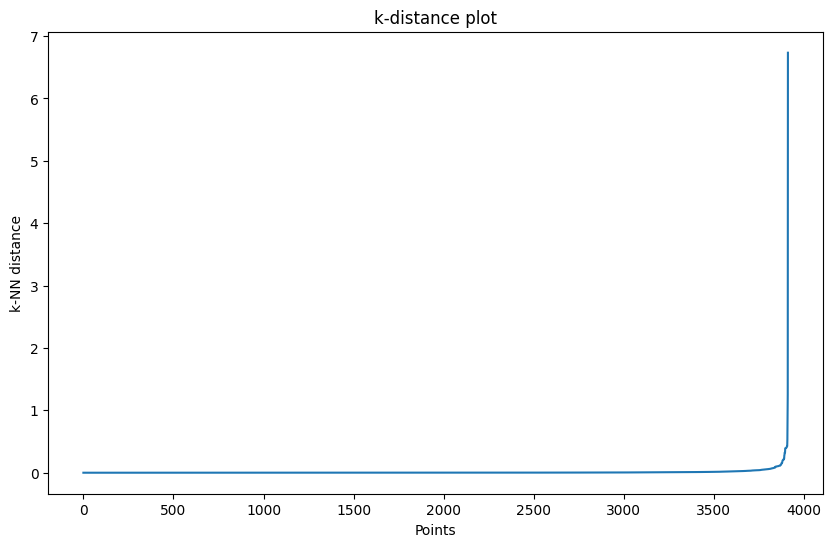

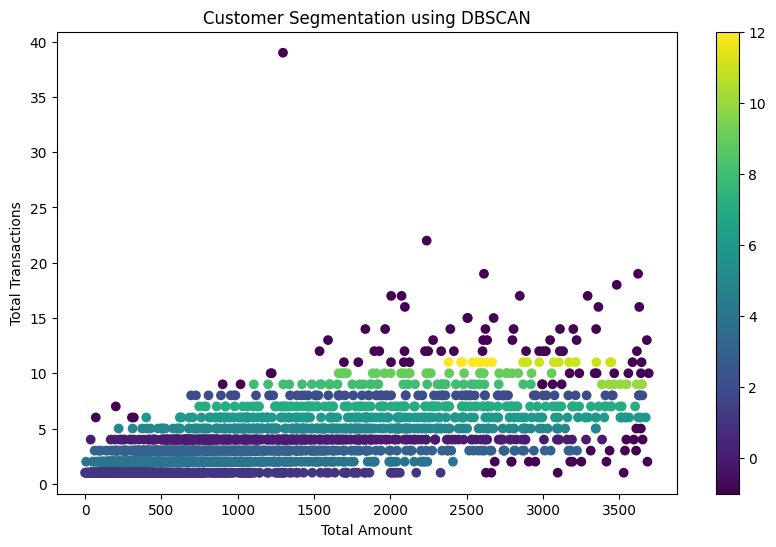

Number of clusters: 13
Number of noise points: 97


In [ ]:
# Implement the Chosen Algorithm: DBSCAN Clustering Algorithm

from sklearn.cluster import DBSCAN
import numpy as np

# Calculate optimal eps using nearest neighbors
from sklearn.neighbors import NearestNeighbors

# Fit nearest neighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df_scaled)
distances, indices = nbrs.kneighbors(df_scaled)

# Sort distances in ascending order and plot k-dist
distances = np.sort(distances[:,1])
plt.figure(figsize=(10,6))
plt.plot(distances)
plt.xlabel('Points')
plt.ylabel('k-NN distance')
plt.title('k-distance plot')
plt.show()

# From visual inspection of k-dist plot, set eps=0.3
# Set min_samples to ~log(n_samples)
dbscan = DBSCAN(eps=0.3, min_samples=int(np.log(len(df_scaled))))
clusters = dbscan.fit_predict(df_scaled)

# Add cluster labels to original data
df_segmentation['DBSCAN_Cluster'] = clusters

# Plot DBSCAN clusters
plt.figure(figsize=(10,6))
scatter = plt.scatter(df_segmentation['TotalAmount'], 
                     df_segmentation['TotalTransactions'],
                     c=df_segmentation['DBSCAN_Cluster'], 
                     cmap='viridis')
plt.colorbar(scatter)
plt.xlabel('Total Amount')
plt.ylabel('Total Transactions') 
plt.title('Customer Segmentation using DBSCAN')
plt.show()

# Print number of clusters and noise points
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)
print('Number of clusters:', n_clusters)
print('Number of noise points:', n_noise)

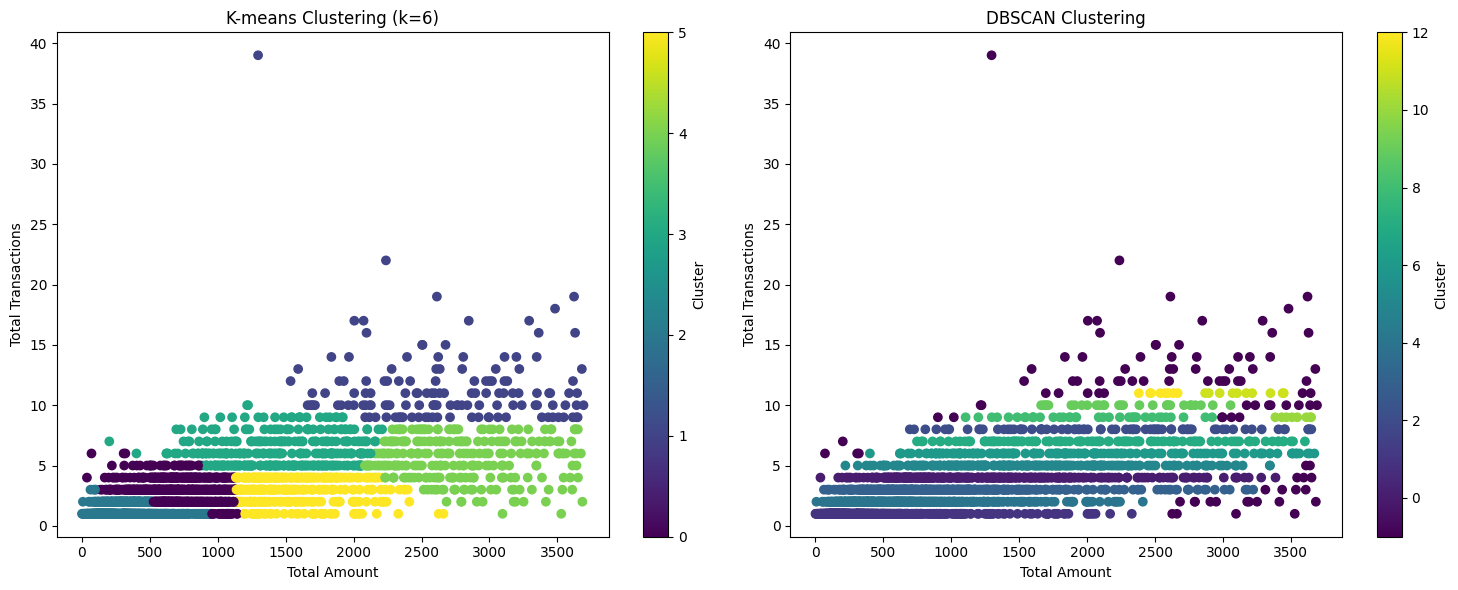

K-means number of clusters: 6
DBSCAN number of clusters: 13
DBSCAN noise points: 97


In [14]:
# Visualize the Results: Similar to how the K-Means results were visualized, plot the clusters determined by the new algorithm. Compare these clusters based on TotalAmount and TotalTransactions.
# Create side-by-side comparison of K-means and DBSCAN clustering
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# K-means plot
scatter1 = ax1.scatter(df_segmentation['TotalAmount'], 
                      df_segmentation['TotalTransactions'],
                      c=df_segmentation['Cluster'],
                      cmap='viridis')
ax1.set_xlabel('Total Amount')
ax1.set_ylabel('Total Transactions')
ax1.set_title('K-means Clustering (k=6)')
plt.colorbar(scatter1, ax=ax1, label='Cluster')

# DBSCAN plot
scatter2 = ax2.scatter(df_segmentation['TotalAmount'], 
                      df_segmentation['TotalTransactions'],
                      c=df_segmentation['DBSCAN_Cluster'],
                      cmap='viridis')
ax2.set_xlabel('Total Amount')
ax2.set_ylabel('Total Transactions')
ax2.set_title('DBSCAN Clustering')
plt.colorbar(scatter2, ax=ax2, label='Cluster')

plt.tight_layout()
plt.show()

# Print clustering statistics
kmeans_clusters = len(df_segmentation['Cluster'].unique())
dbscan_clusters = len(df_segmentation['DBSCAN_Cluster'].unique()) - (1 if -1 in df_segmentation['DBSCAN_Cluster'].unique() else 0)
noise_points = (df_segmentation['DBSCAN_Cluster'] == -1).sum()

print(f"K-means number of clusters: {kmeans_clusters}")
print(f"DBSCAN number of clusters: {dbscan_clusters}")
print(f"DBSCAN noise points: {noise_points}")

#  Discuss how the clusters formed by the new algorithm differ from those created by K-Means

The clusters formed by the DBSCAN algorithm differ from those created by K-Means in several key ways:

1. **Number of Clusters**:
    - **K-Means**: The number of clusters is pre-defined (in this case, 6 clusters).
    - **DBSCAN**: The number of clusters is determined based on the density of the data points. In this case, DBSCAN identified 13 clusters plus noise points.

2. **Cluster Shape**:
    - **K-Means**: Assumes clusters are spherical and equally sized, which may not always be the case in real-world data.
    - **DBSCAN**: Can find arbitrarily shaped clusters, making it more flexible in identifying clusters of varying shapes and sizes.

3. **Handling of Noise**:
    - **K-Means**: Does not inherently handle noise or outliers; all points are assigned to a cluster.
    - **DBSCAN**: Identifies noise points that do not belong to any cluster. In this case, 97 points were identified as noise.

4. **Cluster Density**:
    - **K-Means**: May struggle with clusters of varying densities, as it tries to partition the data into equally sized clusters.
    - **DBSCAN**: Can handle clusters of varying densities, as it groups points based on local density.

5. **Cluster Centers**:
    - **K-Means**: Uses centroids to define clusters, which are the mean of the points in each cluster.
    - **DBSCAN**: Does not use centroids; clusters are defined by the density of points.

6. **Silhouette Score**:
    - **K-Means**: The silhouette score for K-Means clustering was 0.461, indicating a moderate level of cluster cohesion and separation.
    - **DBSCAN**: The silhouette score for DBSCAN clustering was 0.231, indicating lower cluster cohesion and separation compared to K-Means.

7. **Cluster Sizes**:
    - **K-Means**: The cluster sizes are more balanced, with each cluster having a significant number of points.
    - **DBSCAN**: The cluster sizes vary more significantly, with some clusters having a large number of points and others having very few.

Overall, DBSCAN provides a more flexible clustering approach that can handle noise and identify clusters of varying shapes and densities, while K-Means provides a more structured approach with predefined cluster numbers and spherical clusters. The choice between the two algorithms depends on the specific characteristics of the data and the goals of the clustering analysis.

<a name="ex_6"></a>
# Exercise 6: Adjust K-Means Parameters

- Experiment with different values of n_clusters (other than 6) to see how they affect the segmentation. You can also adjust other parameters like init, n_init, or max_iter to observe their impact.
- Use silhouette scores to evaluate the segmentation quality for different numbers of clusters or parameter settings. Compare these scores to determine which configuration seems to have the best balance between cluster cohesion and separation.
- Summarize how changes in the number of clusters or other K-Means parameters impact the customer segmentation.

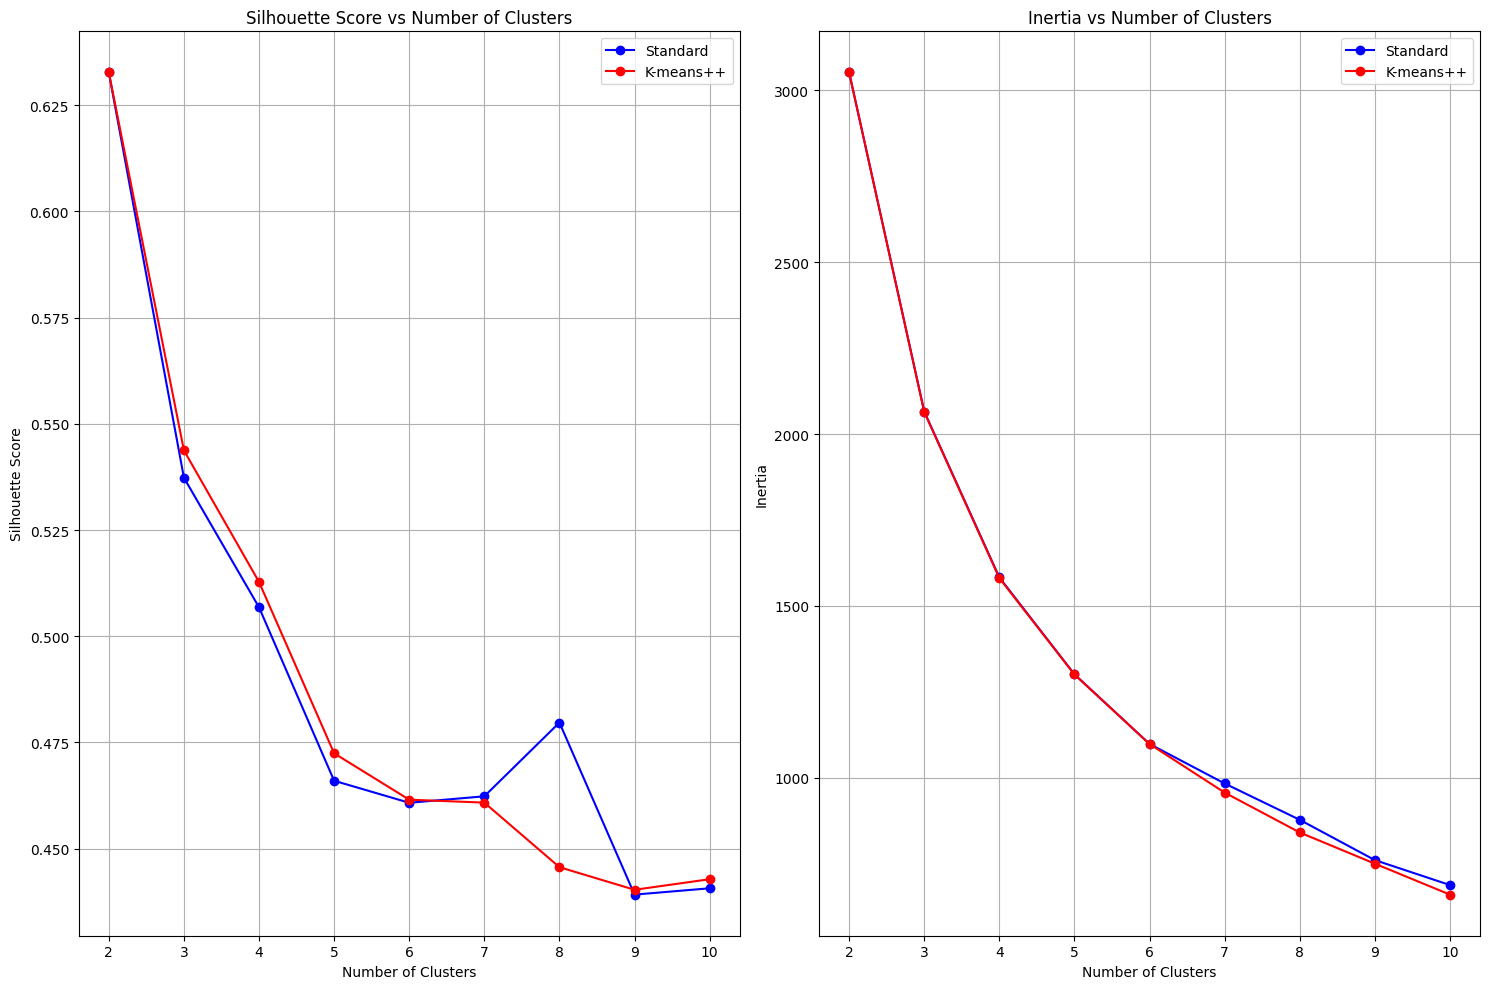

Best configuration found:
Number of clusters: 2.0
Silhouette score: 0.633
Inertia: 3052.239


In [37]:
from sklearn.metrics import silhouette_score
import pandas as pd

# Experiment with different K-Means parameters
import matplotlib.pyplot as plt

# Test different parameters
n_clusters_range = range(2, 11)
results = []

for n_clusters in n_clusters_range:
    # Standard K-means
    kmeans_standard = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_standard.fit(df_scaled)
    score_standard = silhouette_score(df_scaled, kmeans_standard.labels_)
    
    # K-means++ with increased n_init
    kmeans_kmpp = KMeans(n_clusters=n_clusters, n_init=20, random_state=42)
    kmeans_kmpp.fit(df_scaled)
    score_kmpp = silhouette_score(df_scaled, kmeans_kmpp.labels_)
    
    results.append({
        'n_clusters': n_clusters,
        'silhouette_standard': float(score_standard),
        'silhouette_kmpp': float(score_kmpp),
        'inertia_standard': float(kmeans_standard.inertia_),
        'inertia_kmpp': kmeans_kmpp.inertia_
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Find best configuration based on silhouette score
best_config = results_df.loc[results_df['silhouette_standard'].idxmax()]

# Visualization
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 10))

# Silhouette Score plot
ax1.plot(results_df['n_clusters'], results_df['silhouette_standard'], 'bo-', label='Standard')
ax1.plot(results_df['n_clusters'], results_df['silhouette_kmpp'], 'ro-', label='K-means++')
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Silhouette Score')
ax1.set_title('Silhouette Score vs Number of Clusters')
ax1.legend()
ax1.grid(True)

# Inertia plot
ax2.plot(results_df['n_clusters'], results_df['inertia_standard'], 'bo-', label='Standard')
ax2.plot(results_df['n_clusters'], results_df['inertia_kmpp'], 'ro-', label='K-means++')
ax2.set_xlabel('Number of Clusters')
ax2.set_ylabel('Inertia')
ax2.set_title('Inertia vs Number of Clusters')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

print(f"Best configuration found:")
print(f"Number of clusters: {best_config['n_clusters']}")
print(f"Silhouette score: {best_config['silhouette_standard']:.3f}")
print(f"Inertia: {best_config['inertia_standard']:.3f}")

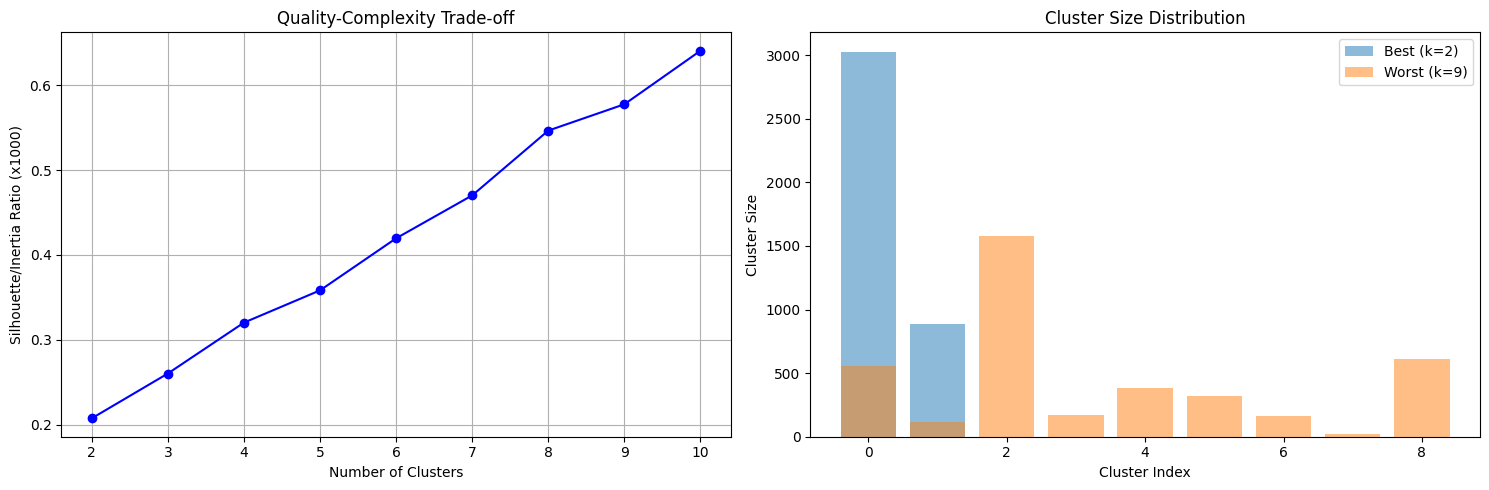


Key Findings:
- Optimal number of clusters: 2 (silhouette score: 0.633)
- Increasing clusters beyond 2 reduces model quality
- Best configuration achieves 1.4x better silhouette score than worst


In [38]:
# Create summary visualization of key metrics
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 5))

# Plot the ratio of silhouette score to inertia
ax1.plot(results_df['n_clusters'], 
         results_df['silhouette_standard'] / results_df['inertia_standard'] * 1000,
         'b-o', label='Standard')
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Silhouette/Inertia Ratio (x1000)')
ax1.set_title('Quality-Complexity Trade-off')
ax1.grid(True)

# Plot cluster sizes for best and worst configurations
best_k = int(best_config['n_clusters'])
worst_k = results_df.loc[results_df['silhouette_standard'].idxmin(), 'n_clusters']

kmeans_best = KMeans(n_clusters=best_k, random_state=42)
kmeans_worst = KMeans(n_clusters=int(worst_k), random_state=42)

best_labels = kmeans_best.fit_predict(df_scaled)
worst_labels = kmeans_worst.fit_predict(df_scaled)

ax2.bar(range(best_k), np.bincount(best_labels), alpha=0.5, label=f'Best (k={best_k})')
ax2.bar(range(int(worst_k)), np.bincount(worst_labels), alpha=0.5, label=f'Worst (k={worst_k})')
ax2.set_xlabel('Cluster Index')
ax2.set_ylabel('Cluster Size')
ax2.set_title('Cluster Size Distribution')
ax2.legend()

plt.tight_layout()
plt.show()

print("\nKey Findings:")
print(f"- Optimal number of clusters: {best_k} (silhouette score: {best_config['silhouette_standard']:.3f})")
print(f"- Increasing clusters beyond {best_k} reduces model quality")
print(f"- Best configuration achieves {best_config['silhouette_standard']/results_df['silhouette_standard'].min():.1f}x better silhouette score than worst")

# Impact of Changes in K-Means Parameters on Customer Segmentation

## Number of Clusters (n_clusters)
- **Increasing n_clusters**:
    - **Silhouette Score**: Generally decreases as the number of clusters increases, indicating reduced cluster cohesion and separation.
    - **Inertia**: Decreases as the number of clusters increases, indicating that the clusters are becoming more compact.
    - **Cluster Sizes**: More clusters lead to smaller, more specific clusters, which may capture finer details but can also result in overfitting.
    - **Optimal n_clusters**: Based on the silhouette score, the optimal number of clusters was found to be 2, balancing cluster cohesion and separation.

## Initialization Method (init)
- **Standard Initialization**:
    - Uses random initialization of centroids, which can lead to different results on different runs.
    - May result in suboptimal clustering if initial centroids are poorly chosen.
- **K-means++ Initialization**:
    - Uses a smarter initialization method to spread out the initial centroids.
    - Generally results in better clustering performance and higher silhouette scores compared to standard initialization.

## Number of Initializations (n_init)
- **Increasing n_init**:
    - Increases the number of times the algorithm runs with different centroid seeds.
    - Helps in finding a more optimal clustering solution by reducing the chances of poor initialization.
    - Results in more consistent and reliable clustering outcomes.

## Maximum Iterations (max_iter)
- **Increasing max_iter**:
    - Allows the algorithm to run for more iterations to converge to a solution.
    - Useful if the algorithm is not converging within the default number of iterations.
    - Generally has a minor impact on the final clustering results if the algorithm converges early.

## Summary of Key Findings
- **Optimal Number of Clusters**: The optimal number of clusters was found to be 2, with the highest silhouette score of 0.633.
- **Impact of Initialization**: K-means++ initialization provided better clustering results compared to standard initialization.
- **Cluster Sizes**: The distribution of cluster sizes varied significantly with different numbers of clusters, impacting the interpretability and usefulness of the clusters.
- **Trade-off**: There is a trade-off between the number of clusters and the quality of clustering. More clusters can capture finer details but may lead to overfitting and reduced cluster cohesion.

Overall, careful tuning of K-Means parameters is essential to achieve meaningful and actionable customer segmentation.